In [3]:
import transformers
import tensorflow as tf

2024-06-23 13:55:24.606716: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 13:55:24.606825: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 13:55:24.711121: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
len(tf.config.experimental.list_physical_devices('GPU'))

1

In [5]:
from transformers import AutoTokenizer,AutoModelForSequenceClassification,AutoConfig

In [6]:
import pandas as pd
import numpy as np
import string
from datasets import Dataset
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df=pd.read_json('/kaggle/input/amazon-health-and-personal-care/Health_and_Personal_Care.jsonl',encoding='ascii',lines=True)
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,[],B07TDSJZMR,B07TDSJZMR,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-02-06 00:49:35.902,3,True
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,[],B08637FWWF,B08637FWWF,AEVWAM3YWN5URJVJIZZ6XPD2MKIA,2020-11-02 22:03:06.880,3,True
2,5,Fantastic,I have been suffering a couple months with hee...,[],B07KJVGNN5,B07KJVGNN5,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,2019-07-24 11:13:58.905,0,True
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",[],B007HY7GC2,B092RP73CX,AEZGPLOYTSAPR3DHZKKXEFPAXUAA,2022-09-04 02:29:02.725,7,True
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,[],B08KYJLF5T,B08KYJLF5T,AEQAYV7RXZEBXMQIQPL6KCT2CFWQ,2022-01-20 23:53:07.262,0,True
...,...,...,...,...,...,...,...,...,...,...
494116,5,Best brush!,"Material is good. Worthy to buy.Firstly, the c...",[],B07KXT7Y48,B07KXT7Y48,AEQG5UEVYBNLWPXB3E2EODQ3EGSQ,2019-04-12 04:21:04.257,6,True
494117,5,It makes my skin softer.,This brush is a good tool for cleaning and mas...,[],B07KXT7Y48,B07KXT7Y48,AGTVLNJAFZTKURBCHLUIH6VEOQCQ,2020-07-17 05:01:39.190,0,True
494118,5,This brush is perfect !,"Honestly, the brush totally is 15inch. Maybe y...",[{'small_image_url': 'https://images-na.ssl-im...,B07KXT7Y48,B07KXT7Y48,AGMA5UN3JPLQLQZ2PFYHJYSC4PNA,2019-03-07 22:33:36.968,173,True
494119,5,Easy to use,"Easy to hold, soft and flexible.",[],B07KXT7Y48,B07KXT7Y48,AE2Q3FXHIVGSSDGTNI4YLXDXMCIA,2019-09-26 12:22:51.244,0,True


In [8]:
data=df[:20000]
data=data[['rating','title','text','helpful_vote','verified_purchase','timestamp']]
data=data[data['verified_purchase'] ==True]
data["raw"]=data['title']+" "+data['text']

In [9]:
conditions = [
    (data['rating'] < 3),
    (data['rating'] == 3),
    (data['rating'] > 3)
]
choices = [0, 1, 2]

data['sentiment'] = np.select(conditions, choices)
data

,rating,title,text,helpful_vote,verified_purchase,timestamp,raw,sentiment
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,True,2020-02-06 00:49:35.902,12 mg is 12 on the periodic table people! Mg f...,2
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,True,2020-11-02 22:03:06.880,Save the lanet using less plastic. Love these ...,2
2,5,Fantastic,I have been suffering a couple months with hee...,0,True,2019-07-24 11:13:58.905,Fantastic I have been suffering a couple month...,2
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,True,2022-09-04 02:29:02.725,It holds the water and makes bubbles. That's ...,2
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,0,True,2022-01-20 23:53:07.262,Not for me Didn't do a thing for me. Not sayin...,0
...,...,...,...,...,...,...,...,...
19995,5,Five Stars,Works but only take it when you have a cramp.,1,True,2017-03-10 00:33:45.000,Five Stars Works but only take it when you hav...,2
19996,3,Works well doesnt charge properly,This works really well when it works. The batt...,0,True,2022-10-12 20:28:02.146,Works well doesnt charge properly This works r...,1
19997,5,Great except,I bought this to put in a friends yard since h...,1,True,2020-04-10 13:22:42.164,Great except I bought this to put in a friends...,2
19998,5,could not get past burning! Gave it another c...,"Bought this for pain in the knee, after applyi...",58,True,2019-08-16 14:47:55.180,could not get past burning! Gave it another c...,2


In [10]:
data.timestamp=pd.to_datetime(data['timestamp'])

In [11]:
data['year']=data.timestamp.dt.year
data

,rating,title,text,helpful_vote,verified_purchase,timestamp,raw,sentiment,year
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,True,2020-02-06 00:49:35.902,12 mg is 12 on the periodic table people! Mg f...,2,2020
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,True,2020-11-02 22:03:06.880,Save the lanet using less plastic. Love these ...,2,2020
2,5,Fantastic,I have been suffering a couple months with hee...,0,True,2019-07-24 11:13:58.905,Fantastic I have been suffering a couple month...,2,2019
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,True,2022-09-04 02:29:02.725,It holds the water and makes bubbles. That's ...,2,2022
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,0,True,2022-01-20 23:53:07.262,Not for me Didn't do a thing for me. Not sayin...,0,2022
...,...,...,...,...,...,...,...,...,...
19995,5,Five Stars,Works but only take it when you have a cramp.,1,True,2017-03-10 00:33:45.000,Five Stars Works but only take it when you hav...,2,2017
19996,3,Works well doesnt charge properly,This works really well when it works. The batt...,0,True,2022-10-12 20:28:02.146,Works well doesnt charge properly This works r...,1,2022
19997,5,Great except,I bought this to put in a friends yard since h...,1,True,2020-04-10 13:22:42.164,Great except I bought this to put in a friends...,2,2020
19998,5,could not get past burning! Gave it another c...,"Bought this for pain in the knee, after applyi...",58,True,2019-08-16 14:47:55.180,could not get past burning! Gave it another c...,2,2019


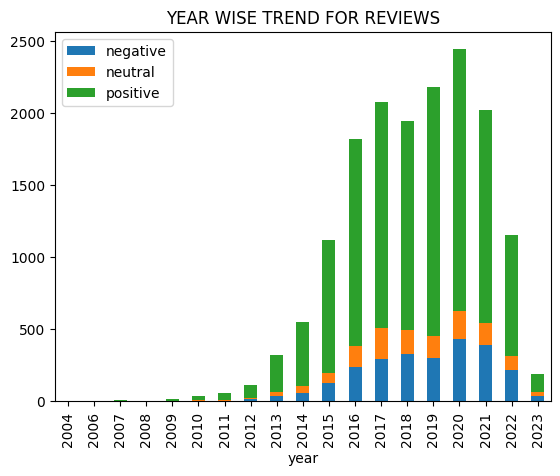

In [12]:
grp=pd.DataFrame()
grp['count']=data.groupby(['year','sentiment']).count()['raw']
grp=pd.pivot_table(grp, index='year',columns='sentiment',values='count')
grp=grp.fillna(0)
grp.plot(kind='bar',stacked=True)
plt.legend(['negative','neutral','positive'])
plt.title('YEAR WISE TREND FOR REVIEWS')
plt.show()

In [13]:
import re
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub(f'[{string.punctuation}]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return str(text)

In [14]:
data['raw']=data['raw'].apply(lambda x: clean_text(str(x)))
data=data.reset_index()


In [15]:
data=data.drop('index',axis=1)
data.head()

,rating,title,text,helpful_vote,verified_purchase,timestamp,raw,sentiment,year
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,True,2020-02-06 00:49:35.902,mg is on the periodic table people mg for ma...,2,2020
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,True,2020-11-02 22:03:06.880,save the lanet using less plastic love these e...,2,2020
2,5,Fantastic,I have been suffering a couple months with hee...,0,True,2019-07-24 11:13:58.905,fantastic i have been suffering a couple month...,2,2019
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,True,2022-09-04 02:29:02.725,it holds the water and makes bubbles thats wh...,2,2022
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,0,True,2022-01-20 23:53:07.262,not for me didnt do a thing for me not saying ...,0,2022


In [16]:
from nltk.corpus import stopwords
from collections import Counter

In [17]:

top = Counter([item for sublist in data['raw'] for item in sublist.split()])
raw_list = pd.DataFrame.from_dict(top,orient='index').reset_index()
raw_list.columns = ['Common_words','count']
raw_list=raw_list.sort_values(by='count',ascending=False)
raw_list[:20].style.background_gradient(cmap='Blues')


,Common_words,count
3,the,24057
29,i,20448
129,and,17295
21,it,16171
12,to,15566
61,a,14826
7,for,9880
9,this,9501
198,my,8753
1,is,8627


In [18]:
def remove_stopwords(x):
    return [y for y in x if y not in stopwords.words('english')]
data['clean_text']=data['raw'].apply(lambda x: remove_stopwords(x.split()))
data.clean_text

0        [mg, periodic, table, people, mg, magnesium, r...
1        [save, lanet, using, less, plastic, love, easy...
2        [fantastic, suffering, couple, months, heel, p...
3        [holds, water, makes, bubbles, thats, bought, ...
4                             [didnt, thing, saying, dont]
                               ...                        
16086                    [five, stars, works, take, cramp]
16087    [works, well, doesnt, charge, properly, works,...
16088    [great, except, bought, put, friends, yard, si...
16089    [could, get, past, burning, gave, another, cha...
16090        [good, quality, arrived, time, good, quality]
Name: clean_text, Length: 16091, dtype: object

In [19]:
data.clean_text=data.clean_text.apply(lambda x: ' '.join(item for item in x))

In [20]:
data.head()

,rating,title,text,helpful_vote,verified_purchase,timestamp,raw,sentiment,year,clean_text
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,True,2020-02-06 00:49:35.902,mg is on the periodic table people mg for ma...,2,2020,mg periodic table people mg magnesium review c...
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,True,2020-11-02 22:03:06.880,save the lanet using less plastic love these e...,2,2020,save lanet using less plastic love easy multit...
2,5,Fantastic,I have been suffering a couple months with hee...,0,True,2019-07-24 11:13:58.905,fantastic i have been suffering a couple month...,2,2019,fantastic suffering couple months heel pain pl...
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,True,2022-09-04 02:29:02.725,it holds the water and makes bubbles thats wh...,2,2022,holds water makes bubbles thats bought cheap w...
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,0,True,2022-01-20 23:53:07.262,not for me didnt do a thing for me not saying ...,0,2022,didnt thing saying dont


In [21]:
import spacy


nlp = spacy.load('en_core_web_sm')

def lemmatizer(text):
    return nlp(text)

lemm_words=data['clean_text'].apply(lambda x: lemmatizer(x))
lemm_words=lemm_words.apply(lambda x: ' '.join([token.lemma_ if token.lemma_ != '-PRON-' else token.text for token in x]))

data['lemm_words']=lemm_words


In [22]:

data['lemm_words']

0        mg periodic table people mg magnesium review c...
1        save lanet use less plastic love easy multitas...
2        fantastic suffering couple month heel pain pla...
3        hold water make bubble that s buy cheap want m...
4                                  do not thing say do not
                               ...                        
16086                            five star work take cramp
16087    work well do not charge properly work really w...
16088    great except buy put friend yard since birthda...
16089    could get past burning give another chance rea...
16090                good quality arrive time good quality
Name: lemm_words, Length: 16091, dtype: object

In [23]:
data['clean_text']

0        mg periodic table people mg magnesium review c...
1        save lanet using less plastic love easy multit...
2        fantastic suffering couple months heel pain pl...
3        holds water makes bubbles thats bought cheap w...
4                                  didnt thing saying dont
                               ...                        
16086                          five stars works take cramp
16087    works well doesnt charge properly works really...
16088    great except bought put friends yard since bir...
16089    could get past burning gave another chance rea...
16090               good quality arrived time good quality
Name: clean_text, Length: 16091, dtype: object

In [24]:
data['final_data']=data['lemm_words']
data.head()

,rating,title,text,helpful_vote,verified_purchase,timestamp,raw,sentiment,year,clean_text,lemm_words,final_data
0,4,12 mg is 12 on the periodic table people! Mg f...,This review is more to clarify someone else’s ...,3,True,2020-02-06 00:49:35.902,mg is on the periodic table people mg for ma...,2,2020,mg periodic table people mg magnesium review c...,mg periodic table people mg magnesium review c...,mg periodic table people mg magnesium review c...
1,5,Save the lanet using less plastic.,Love these easy multitasking bleach tablets. B...,3,True,2020-11-02 22:03:06.880,save the lanet using less plastic love these e...,2,2020,save lanet using less plastic love easy multit...,save lanet use less plastic love easy multitas...,save lanet use less plastic love easy multitas...
2,5,Fantastic,I have been suffering a couple months with hee...,0,True,2019-07-24 11:13:58.905,fantastic i have been suffering a couple month...,2,2019,fantastic suffering couple months heel pain pl...,fantastic suffering couple month heel pain pla...,fantastic suffering couple month heel pain pla...
3,4,It holds the water and makes bubbles. That's ...,"It's cheap and it does what I wanted. The ""ma...",7,True,2022-09-04 02:29:02.725,it holds the water and makes bubbles thats wh...,2,2022,holds water makes bubbles thats bought cheap w...,hold water make bubble that s buy cheap want m...,hold water make bubble that s buy cheap want m...
4,1,Not for me,Didn't do a thing for me. Not saying they don'...,0,True,2022-01-20 23:53:07.262,not for me didnt do a thing for me not saying ...,0,2022,didnt thing saying dont,do not thing say do not,do not thing say do not


<function matplotlib.pyplot.show(close=None, block=None)>

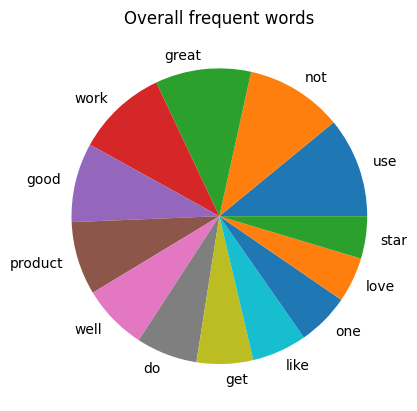

In [25]:
top = Counter([item for sublist in data['final_data'] for item in sublist.split()])
temp = pd.DataFrame.from_dict(top, orient='index').reset_index()
temp.columns = ['Common_words','count']

temp=temp[temp['count']>1].sort_values(by='count', ascending=False).reset_index()
temp.drop('index',axis=1,inplace=True)

plt.pie(temp.loc[:12,'count'],labels=temp.loc[:12,'Common_words'],colors=sns.color_palette())
plt.title('Overall frequent words')
plt.show

In [26]:
def words(sentiment,df):
    words=[]
    for idx, sublist in enumerate(df['clean_text']):
        if df.loc[idx,'sentiment']==sentiment:
            for item in sublist.split():
                words.append(item) 
    return words


top0=Counter(words(0,data))
temp0 = pd.DataFrame.from_dict(top0, orient='index').reset_index()
temp0.columns = ['Common_words','count']
temp0=temp0[temp0['count']>1].sort_values(by='count', ascending=False).reset_index()
temp0.drop('index',axis=1,inplace=True)



top1 = Counter(words(1,data))
temp1 = pd.DataFrame.from_dict(top1, orient='index').reset_index()
temp1.columns = ['Common_words','count']
temp1=temp1[temp1['count']>1].sort_values(by='count', ascending=False).reset_index()
temp1.drop('index',axis=1,inplace=True)





top2=Counter(words(2,data))
temp2 = pd.DataFrame.from_dict(top2, orient='index').reset_index()
temp2.columns = ['Common_words','count']
temp2=temp2[temp2['count']>1].sort_values(by='count', ascending=False).reset_index()
temp2.drop('index',axis=1,inplace=True)





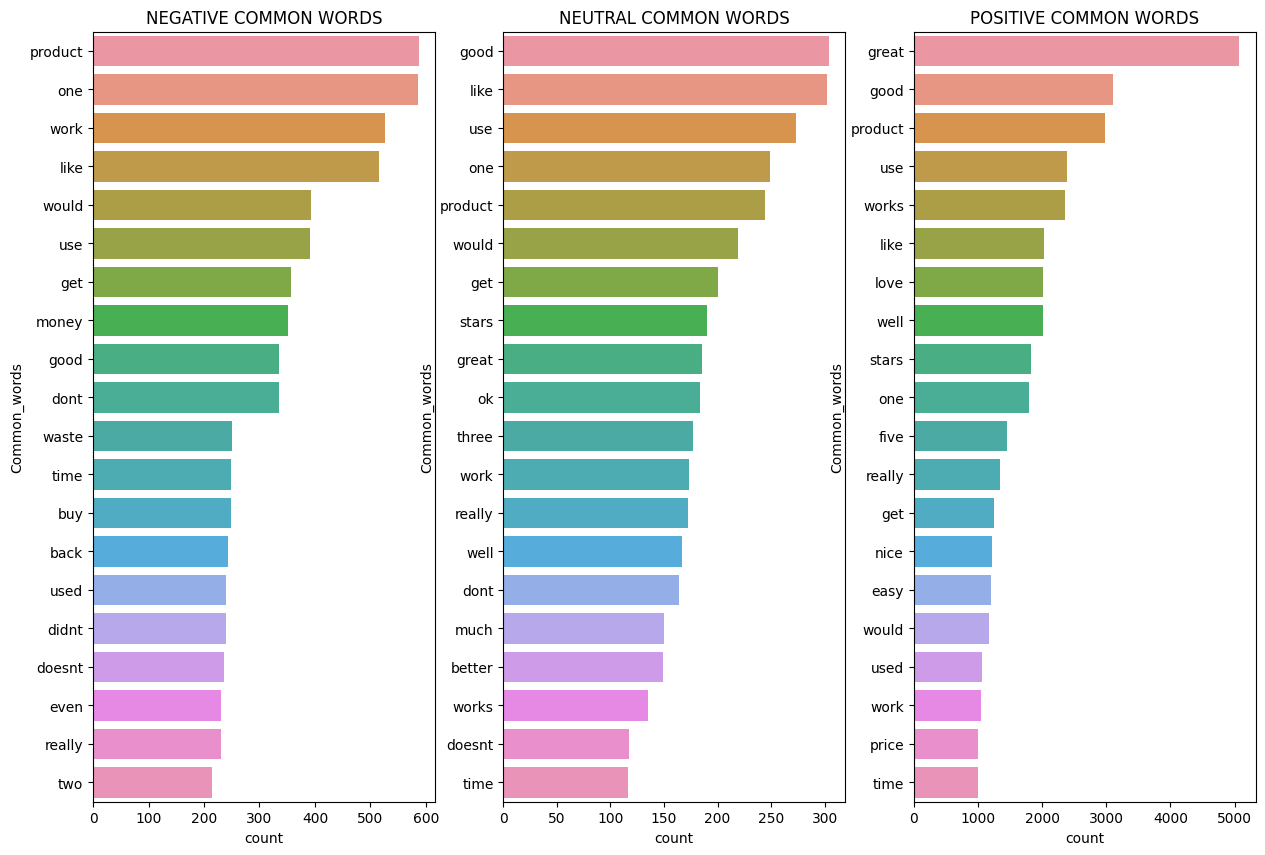

In [27]:


fig, axes= plt.subplots(nrows=1,ncols=3,figsize=(15,10))

sns.barplot(data=temp1[:20],y='Common_words',x='count',ax=axes[1])
axes[1].set_title('NEUTRAL COMMON WORDS')

sns.barplot(data=temp0[:20],y='Common_words',x='count',ax=axes[0])
axes[0].set_title('NEGATIVE COMMON WORDS')

sns.barplot(data=temp2[:20],y='Common_words',x='count',ax=axes[2])
axes[2].set_title('POSITIVE COMMON WORDS')

plt.show()

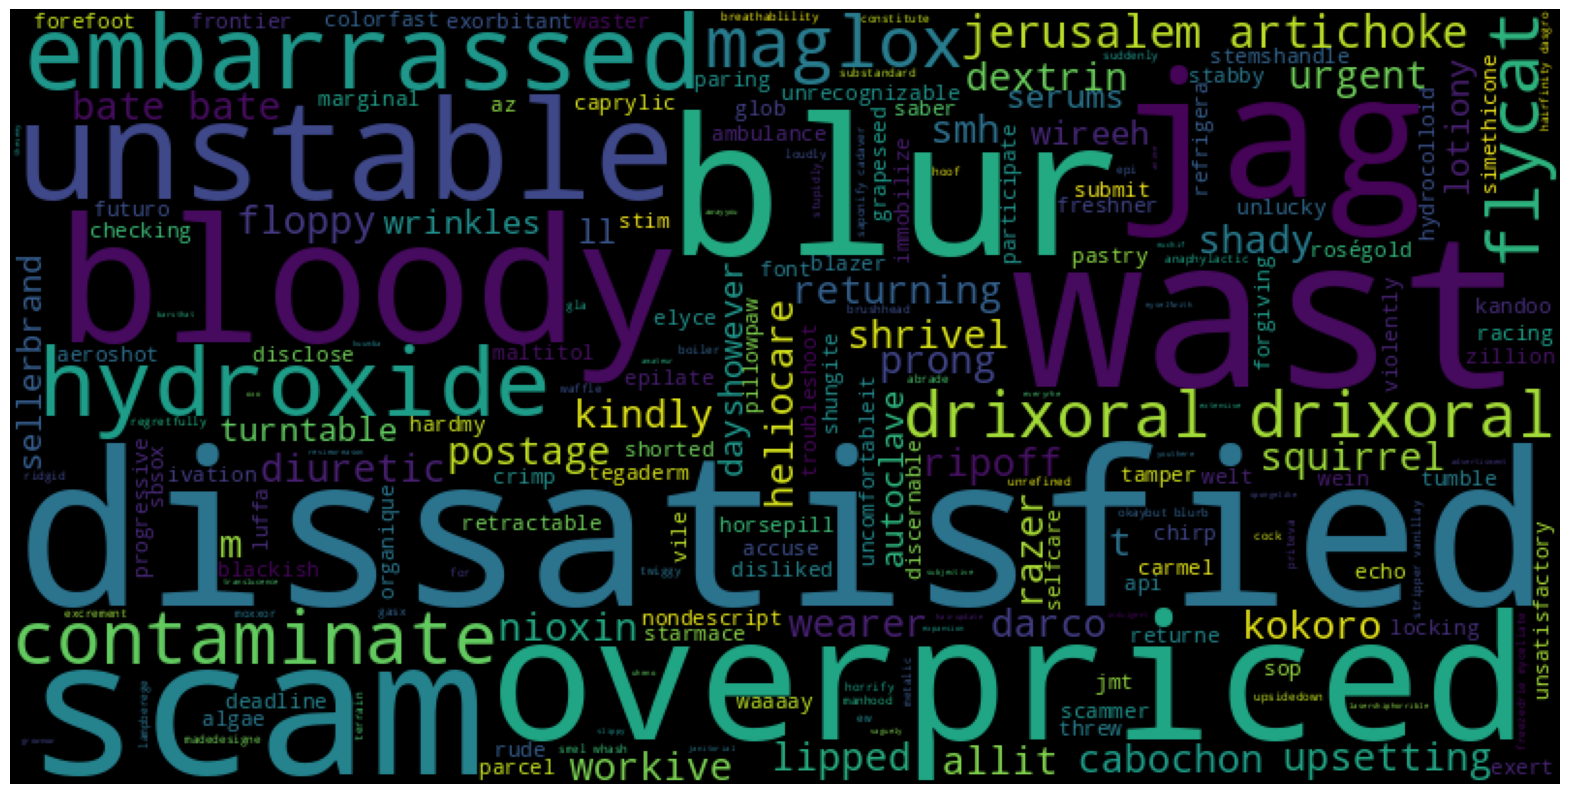

In [28]:
from wordcloud import WordCloud


def exclusive_words(sentiment,df):
    words=[]
    for idx, sublist in enumerate(df['final_data']):
        if df.loc[idx,'sentiment']==sentiment:
            for item in sublist.split():
                words.append(item) 
    other_words=[]
    for idx, sublist in enumerate(df['final_data']):
        if df.loc[idx,'sentiment']!=sentiment:
            for item in sublist.split():
                other_words.append(item) 
    exc_words=[word for word in words if word not in other_words]
    return exc_words

words=exclusive_words(0,data)
words=' '.join(item for item in words)
wordcloud = WordCloud(width=800, height=400, background_color='black',random_state=1,stopwords=['hyaluronic','horsetail','starwest','bracket','S']).generate(words)
plt.figure(figsize=(20,25))
plt.axis("off")
plt.imshow(wordcloud)


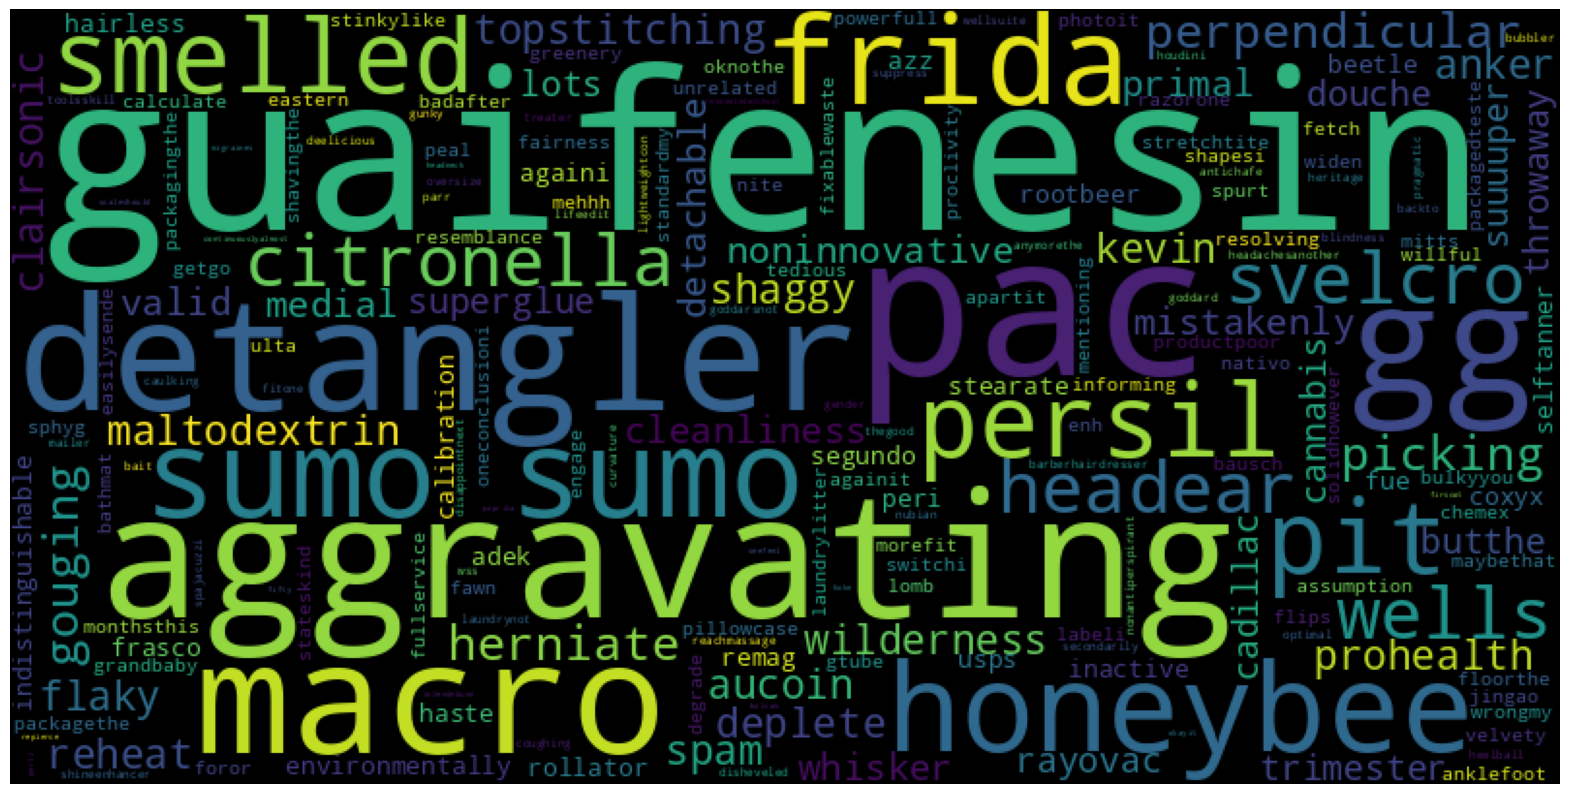

In [29]:
words=exclusive_words(1,data)
words=' '.join(item for item in words)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(words)
plt.figure(figsize=(20,25))
plt.axis("off")
plt.imshow(wordcloud)


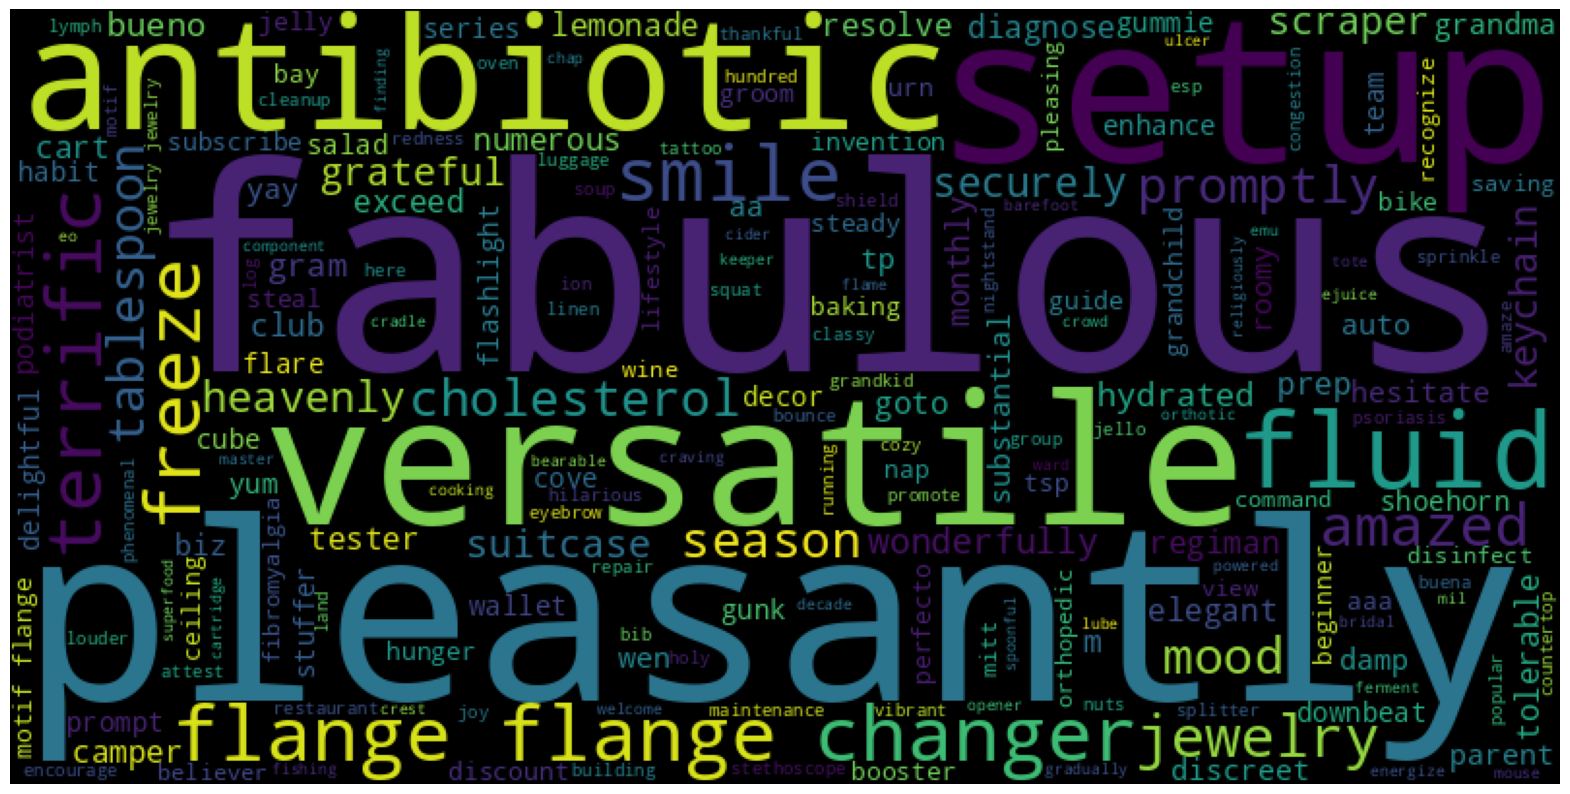

In [30]:
words=exclusive_words(2,data)
words=' '.join(item for item in words)
wordcloud = WordCloud(width=800, height=400, background_color='black',random_state=1,stopwords=['treatment','hip','S','chronic']).generate(words)
plt.figure(figsize=(20,25))
plt.axis("off")
plt.imshow(wordcloud)

In [31]:
checkpoint="cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer=AutoTokenizer.from_pretrained(checkpoint)

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [32]:
config= AutoConfig.from_pretrained(checkpoint)
config

RobertaConfig {
  "_name_or_path": "cardiffnlp/twitter-roberta-base-sentiment-latest",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative",
    "1": "neutral",
    "2": "positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative": 0,
    "neutral": 1,
    "positive": 2
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.41.1",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [33]:
model= AutoModelForSequenceClassification.from_pretrained(checkpoint)

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly 

In [34]:
from scipy.special import softmax
inp=tokenizer("this is the worst model",return_tensors='pt')
output=model(**inp)

scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores
ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = config.id2label[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")


1) negative 0.9297
2) neutral 0.0598
3) positive 0.0105


In [35]:
data_l=list(data['final_data'])
label_l=list(data['sentiment'])

In [81]:
def tokenizer_f(batch):
    return tokenizer(batch['final_text'],truncation=True,max_length=128)

In [82]:
dictd={'final_text':data_l,
       'labels':label_l}
raw_data=Dataset.from_dict(dictd)
raw_data

Dataset({
    features: ['final_text', 'labels'],
    num_rows: 16091
})

In [83]:
tokenized_data=raw_data.map(tokenizer_f,batched=True,batch_size=8)


Map:   0%|          | 0/16091 [00:00<?, ? examples/s]

In [84]:
tokenized_data

Dataset({
    features: ['final_text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 16091
})

In [85]:
sample=tokenized_data[:3]
sample={k:v for k,v in sample.items() if k not in ['final_text']}
[len(x) for x in sample['input_ids']]

[103, 31, 31]

In [86]:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [87]:
batch=data_collator(sample)
[len(x) for x in batch['input_ids']]

[103, 103, 103]

In [88]:
tokenized_train=Dataset.from_dict(tokenized_data[:12500])
tokenized_val=Dataset.from_dict(tokenized_data[12500:])

In [89]:
print(tokenized_train)

Dataset({
    features: ['final_text', 'labels', 'input_ids', 'attention_mask'],
    num_rows: 12500
})


In [90]:
tokenized_train=tokenized_train.remove_columns(['final_text'])
tokenized_val=tokenized_val.remove_columns(['final_text'])

In [91]:
model.parameters()

<generator object Module.parameters at 0x79caaf7e6880>

In [92]:
from torch.utils.data import DataLoader

In [93]:
tokenized_train.set_format('torch')
tokenized_val.set_format('torch')

In [94]:
print(tokenized_train)

Dataset({
    features: ['labels', 'input_ids', 'attention_mask'],
    num_rows: 12500
})


In [95]:
training_loader=DataLoader(tokenized_train,shuffle=True,collate_fn=data_collator,batch_size=8)
val_loader=DataLoader(tokenized_val,shuffle=False,collate_fn=data_collator,batch_size=8)

In [96]:
import torch

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
device

device(type='cuda')

In [103]:
from transformers import get_scheduler

num_epochs = 3
num_training_steps = num_epochs * len(training_loader)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)

4689


In [98]:
from tqdm.auto import tqdm

progress_bar = tqdm(range(num_training_steps))

model.train()
for epoch in range(num_epochs):
    for batch in training_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = outputs.loss
        loss.backward()

        optimizer.step()
        lr_scheduler.step()
        optimizer.zero_grad()
        progress_bar.update(1)

  0%|          | 0/4689 [00:00<?, ?it/s]

In [118]:

from sklearn.metrics import accuracy_score
model.eval()

all_preds = []
all_labels = []

for batch in val_loader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    all_preds.extend(predictions.cpu().numpy())
    all_labels.extend(batch['labels'].cpu().numpy())
   

acc = accuracy_score(y_true=all_labels, y_pred=all_preds)


print(f'Model Accuracy: {acc:.2f}')


Model Accuracy: 0.87


In [119]:
model.save_pretrained('/kaggle/working/final_model')